In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [45]:
def plot_svc_decision_boundry(svc_clf, xmin, xmax):
    w = svc_clf.coef_[0]
    b = svc_clf.intercept_[0]

    x0 = np.linspace(xmin,xmax, 200)
    decision_boundry = -(w[0]/w[1]) * x0 - b/w[1]
    margin = 1/w[1]

    gutter_up = decision_boundry + margin
    gutter_down = decision_boundry - margin

    svs = svc_clf.support_vectors_
    plt.scatter(svs[:,0], svs[:,1], s = 180)
    plt.plot(x0, decision_boundry,'k-')
    plt.plot(x0, gutter_up, 'k--')
    plt.plot(x0, gutter_down,'k--')

In [46]:
from sklearn.svm import SVC

In [47]:
x_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])
y_outliers = np.array([0, 0])
xo1 = np.concatenate([x, x_outliers[:1]], axis=0)
yo1 = np.concatenate([y, y_outliers[:1]], axis=0)
xo2 = np.concatenate([x, x_outliers[1:]], axis=0)
yo2 = np.concatenate([y, y_outliers[1:]], axis=0)

svm_clf2 = SVC(kernel="linear", C=10**9)#float("inf"))
svm_clf2.fit(xo2, yo2)

SVC(C=1000000000, kernel='linear')

In [48]:
iris = datasets.load_iris()

In [49]:
x = iris['data'][:,(2,3)]
y = (iris['target'] == 2).astype(np.int64)

In [50]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [51]:
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler 

In [52]:
scaler = StandardScaler()
svc_clf = LinearSVC(C = 1, loss = 'hinge')
svc_clf_scaled = Pipeline([('scaler', scaler),('classifier', svc_clf)])

In [53]:
svc_clf_scaled.fit(x,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', LinearSVC(C=1, loss='hinge'))])

In [54]:
svc_clf_scaled.predict([x[0]])

array([0], dtype=int64)

In [55]:
b2 = svc_clf.decision_function([-scaler.mean_/scaler.scale_])
w2 = svc_clf.coef_[0]/scaler.scale_
svc_clf.intercept = np.array([b2])
svc_clf.coef_ = np.array([w2])

In [56]:
t  = y*2 -1
suppert_vector_idx2 = (t*(x.dot(w2)+ b2)<1).ravel()
svc_clf.support_vectors_ = x[suppert_vector_idx2]

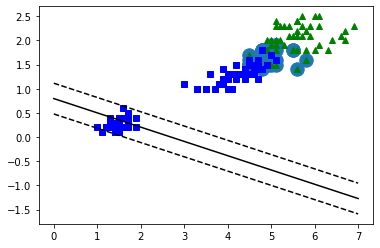

In [62]:
plt.plot(x[:,0][y==1], x[:,1][y==1], 'g^')
plt.plot(x[:,0][y==0], x[:,1][y==0], 'bs')
plot_svc_decision_boundry(svc_clf, 0,7)
plt.show()